In [2]:
%matplotlib inline
from __future__ import (absolute_import, unicode_literals, division,
                        print_function)
from srttools.core.calibration import *
import numpy as np
import os



# Preliminaries

TBW

# Rapid calibration: Total power 

In the following, I will assume that all fits went perfectly. 
This is not the case, calibrators are not all very reliable, etc.
But still, it is good for first-order calibration.

In [3]:
# read config file
config_file_tp = \
    os.path.abspath(os.path.join('/Users/meo/devel/spyder_projects/srt-single-dish-tools',
                                     'TEST_DATASET',
                                     'test_calib.ini'))


Get the full table of scans, each fit with a linear + Gaussian function. 
If a source is in the calibrator list, the conversion between flux and counts is done automatically. 

In [4]:
full_table_tp = get_full_table(config_file_tp, channel='Ch0')


Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124434-scicom-3C48_001_003.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124452-scicom-3C48_001_004.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124511-scicom-3C48_001_005.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124528-scicom-3C48_001_006.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/summary.fits
../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/summary.fits is an invalid file
Loading file ../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/20150624-124810-scicom-3C123_002_003.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/20150624-124828-scicom-3C123_002_004.fits
Loading file ../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/20150624-124847-scicom-3C123_002_005.fits
Loading file ../../TEST_DAT

Here's the table as it is now. Notice the Flux = $1\pm0$ in Sources, and the correct values for calibrators



In [5]:
full_table_tp

Dir,File,Scan Type,Source,Time,Frequency,Bandwidth,Counts,Counts Err,Width,Flux Density,Flux Density Err,Kind,Elevation,Flux/Counts,Flux/Counts Err,RA,Dec,Fit RA,Fit Dec
str200,str200,str200,str200,float128,float64,float64,float64,float64,float64,float64,float64,str200,float64,float64,float64,float64,float64,float64,float64
20150624/tp/20150624-130110-scicom-3C48,20150624-130110-scicom-3C48_001_003.fits,Dec>,3C48,57197.542526,6900.0,680.0,48.4871056694,0.161149578883,0.0182190072702,3.85602836538,0.0,Calibrator,18.8371611224,54.0782802408,0.179732156977,24.42207125,33.159755,nan,33.1610901969
20150624/tp/20150624-130110-scicom-3C48,20150624-130127-scicom-3C48_001_004.fits,Dec<,3C48,57197.5427251,6900.0,680.0,48.0665170427,0.129643775841,0.0185177497949,3.85602836538,0.0,Calibrator,18.7980871342,54.5514726213,0.147134831551,24.42207125,33.159755,nan,33.160499193
20150624/tp/20150624-130110-scicom-3C48,20150624-130147-scicom-3C48_001_005.fits,RA>,3C48,57197.5429462,6900.0,680.0,51.0601225897,0.123135376588,0.018222305147,3.85602836538,0.0,Calibrator,18.7171572129,51.3531726026,0.123842089025,24.42207125,33.159755,24.4146467081,nan
20150624/tp/20150624-130110-scicom-3C48,20150624-130204-scicom-3C48_001_006.fits,RA<,3C48,57197.543151,6900.0,680.0,50.7214386717,0.138853789244,0.018112934866,3.85602836538,0.0,Calibrator,18.6862315425,51.6960748181,0.141521929692,24.42207125,33.159755,24.4153187009,nan
20150624/tp/20150624-130416-scicom-3C123,20150624-130416-scicom-3C123_002_003.fits,Dec>,3C123,57197.5446707,6900.0,680.0,152.069711532,0.34613336983,0.0183468783824,11.3335366754,0.0,Calibrator,49.6292219099,50.6794210475,0.115353929534,69.2682304167,29.6705052778,nan,29.6728766371
20150624/tp/20150624-130416-scicom-3C123,20150624-130433-scicom-3C123_002_004.fits,Dec<,3C123,57197.5448693,6900.0,680.0,150.574125663,0.303929511589,0.0186059842283,11.3335366754,0.0,Calibrator,49.5984874295,51.1827972128,0.103310993772,69.2682304167,29.6705052778,nan,29.6733246142
20150624/tp/20150624-130416-scicom-3C123,20150624-130452-scicom-3C123_002_005.fits,RA>,3C123,57197.5450968,6900.0,680.0,151.720304614,0.272409842295,0.0184031674636,11.3335366754,0.0,Calibrator,49.5135436244,50.7961341027,0.0912031314156,69.2682304167,29.6705052778,69.2639462592,nan
20150624/tp/20150624-130416-scicom-3C123,20150624-130509-scicom-3C123_002_006.fits,RA<,3C123,57197.5452941,6900.0,680.0,152.663843437,0.298608943885,0.0184155535791,11.3335366754,0.0,Calibrator,49.4759863926,50.4821886163,0.0987426537179,69.2682304167,29.6705052778,69.2644480502,nan
20150624/tp/20150624-133844-scicom-3C279,20150624-133918-scicom-3C279_008_005.fits,RA>,3C279,57197.56901,6900.0,680.0,247.879744536,0.926266063458,0.0182321510138,0.00147058823529,0.0,Source,13.0379027778,0.0040342142593,1.5074873375e-05,194.0465275,-5.78931241667,194.049297138,nan


To select the calibrator and the source data from the table, it is sufficient to do

In [6]:
calibrator_table_tp = full_table_tp[full_table_tp["Kind"] == "Calibrator"]

# Similarly for the source table
source_table_tp = full_table_tp[full_table_tp["Kind"] == "Source"]


To obtain the mean calibration values and their errors (Jansky/Counts), we take the `Flux / Counts` column and normalize by the bandwidth

In [7]:
fc = np.mean(calibrator_table_tp["Flux/Counts"]) / calibrator_table_tp["Bandwidth"][0]
fce = np.sqrt(np.sum(calibrator_table_tp["Flux/Counts Err"] ** 2))\
    / len(calibrator_table_tp) / calibrator_table_tp["Bandwidth"][0]

Then, the calibrated source flux can be obtained through

In [8]:
source_table_tp["Flux"] = source_table_tp["Counts"] * fc
source_table_tp["Flux Err"] = \
    (source_table_tp["Counts Err"] / source_table_tp["Counts"] + fce / fc) * \
    source_table_tp["Flux"]

Let's look at 3C279 data

In [9]:
filtered = source_table_tp[source_table_tp["Source"] == "3C279"]
print(filtered[("Source", "Counts", "Counts Err", "Flux", "Flux Err")])

Source     Counts      Counts Err        Flux         Flux Err   
------ ------------- -------------- ------------- ---------------
 3C279 247.879744536 0.926266063458 18.6222301021 0.0750688951558
 3C279 245.290083071  0.88579628461 18.4276790234 0.0719712862789
 3C279 263.493085646 0.932953180594 19.7951990002 0.0759165804616
 3C279 252.546476397 0.991022959482 18.9728233089 0.0800370366068
 3C279 259.224171234  2.19641005498 19.4744922535  0.170740712906
 3C279 249.035128039 0.902199869335 18.7090295197 0.0732864494089
 3C279 247.478423703 0.880833541398 18.5920804466 0.0716468527846
 3C279 252.503222998  3.74125914853 18.9695738512  0.286650506057
 3C279 296.181490346  3.45885085165 22.2509502563  0.266400280973
 3C279 299.272014527  5.44834682753 22.4831291805  0.415931638193
   ...           ...            ...           ...             ...
 3C279 348.915038069  9.92934077366 26.2126142544  0.753669003459
 3C279 264.041857676  6.51269296828 19.8364260841  0.495112618007
 3C279 273

If we want to play it fancy, we can obtain a histogram of the calibrated fluxes, finding possible outliers.

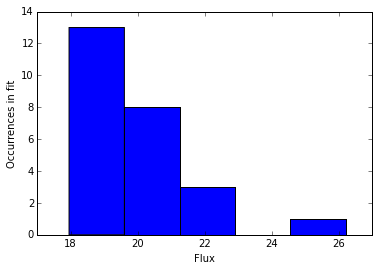

In [10]:
from astropy.visualization import hist
_ = hist(filtered["Flux"], bins='knuth')
plt.xlabel("Flux")
plt.ylabel("Occurrences in fit")

The function `show_calibration` plots this and the calibrator data.

Source  Flux Density  Flux Density Err     Counts      Counts Err  
------ ------------- ----------------- ------------- --------------
 3C279 18.6222301021 0.000110395434053 247.879744536 0.926266063458
 3C279 18.4276790234 0.000105840126881 245.290083071  0.88579628461
 3C279 19.7951990002 0.000111642030091 263.493085646 0.932953180594
 3C279 18.9728233089 0.000117701524422 252.546476397 0.991022959482
 3C279 19.4744922535 0.000251089283686 259.224171234  2.19641005498
 3C279 18.7090295197 0.000107774190307 249.035128039 0.902199869335
 3C279 18.5920804466 0.000105363018801 247.478423703 0.880833541398
 3C279 18.9695738512 0.000421544861849 252.503222998  3.74125914853
 3C279 22.2509502563 0.000391765119079 296.181490346  3.45885085165
 3C279 22.4831291805 0.000611664173813 299.272014527  5.44834682753
   ...           ...               ...           ...            ...
 3C279 26.2126142544  0.00110833676979 348.915038069  9.92934077366
 3C279 19.8364260841 0.000728106791187 264.04185

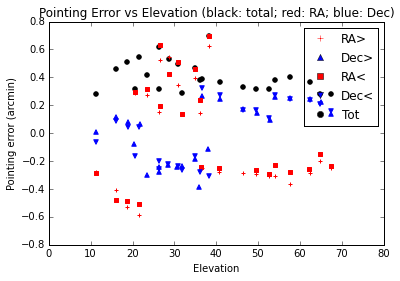

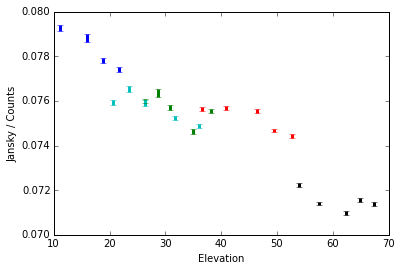

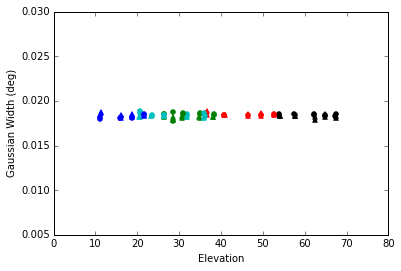

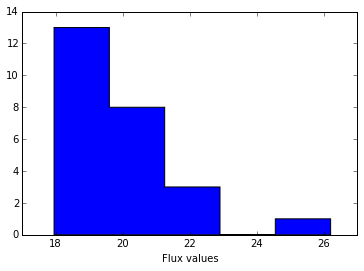

In [11]:
show_calibration(full_table_tp)

There seems to be a strong dependence on elevation.
Let's see if results with Channel 1 are consistent.

In [12]:
%%capture shutup
full_table_tp1 = get_full_table(config_file_tp, channel='Ch1')

# ----- This time I captured the output of the function above, full of "loading file..." 
# and "saving to file...", not very informative

Source  Flux Density  Flux Density Err     Counts      Counts Err  
------ ------------- ----------------- ------------- --------------
 3C279 20.7231098149 0.000188240806048 321.799080503  1.87524522081
 3C279 20.5520722752 0.000149847306892 319.143121842  1.47076154082
 3C279 18.2337816143 0.000211102944817 283.143515138   2.1301648177
 3C279 18.5084480628  0.00024133654133 287.408676657  2.44792252695
 3C279 19.5971923937 8.97967283216e-05 304.315257172 0.841846187164
 3C279 19.1461961191 7.93751242246e-05 297.311955652 0.734247937509
 3C279 19.6857016008 0.000100199436019 305.689673546 0.951212090512
 3C279 20.9326122508 9.28979580887e-05 325.052341806 0.867346062183
 3C279 18.5354887066 0.000134716294427 287.828577647  1.32193113309
 3C279 18.3125392639  0.00012455217717 284.366504324  1.21581419532
   ...           ...               ...           ...            ...
 3C279   20.38081931 0.000111299162172 316.483817941  1.06464606727
 3C279 20.3606343222 0.000200672279254 316.17037

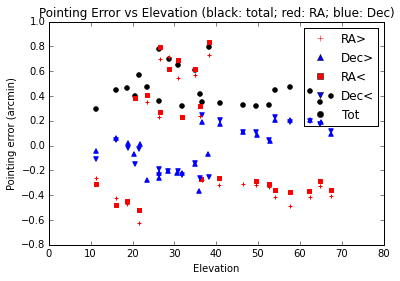

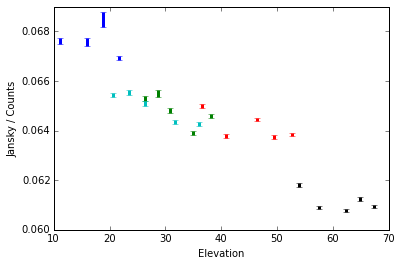

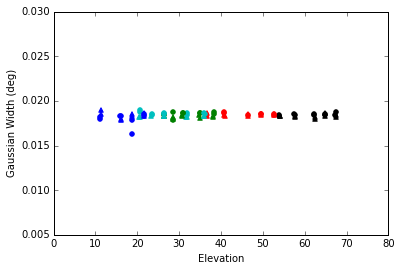

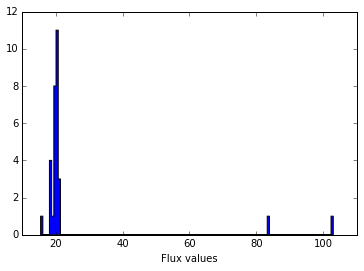

In [13]:
show_calibration(full_table_tp1)

Results for Channel 1 are largely consistent. Encouraging!

# And the Roach 2 data?

In [14]:
config_file_r2 = \
    os.path.abspath(os.path.join('/Users/meo/devel/spyder_projects/srt-single-dish-tools',
                                     'TEST_DATASET',
                                     'test_calib_roach.ini'))



In [15]:
%%capture shutup
full_table_r2 = get_full_table(config_file_r2, channel='Ch0')

Source  Flux Density  Flux Density Err     Counts      Counts Err 
------ ------------- ----------------- ------------- -------------
 3C279 14.5492624827 0.000185866828017 4810277.58853 89304.3263179
 3C279 15.2065355481 0.000267558627306 5027585.22869 129687.971419
 3C279 14.9329623059 0.000171649979209 4937136.43533 82178.0058673
 3C279 17.5900104045 0.000142481674472 5815609.75558 67187.9575418
 3C279 16.6173833944 0.000140305973898 5494039.78499 66300.9985056
 3C279 15.9057806362 8.13149766784e-05  5258769.6602 37186.0900709
 3C279 14.9913380036 6.28529851028e-05 4956436.61022 28210.7820524
 3C279 14.1868256284  6.0650158976e-05 4690448.70513 27277.1779532
 3C279 14.2087277608 5.69309167036e-05 4697689.98878 25428.3695952
 3C279 17.5218431775 0.000238320627303   5793072.305 114730.832625
   ...           ...               ...           ...           ...
 3C279 14.8190413096 0.000217648126903 4899471.87219 105012.361927
 3C279 15.6489935001 0.000110915499946 5173870.68975 51916.579

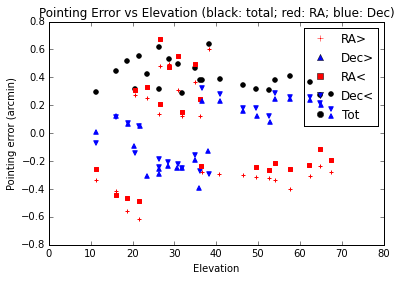

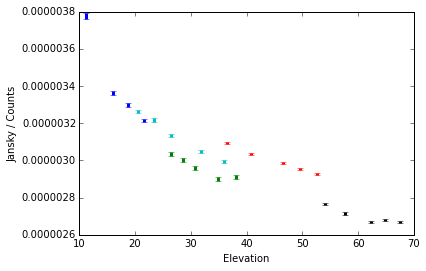

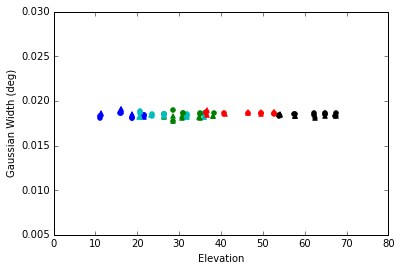

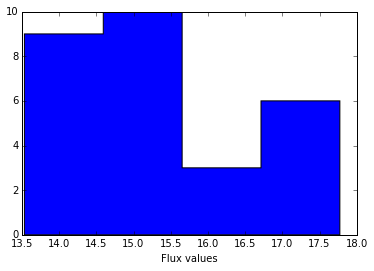

In [16]:
show_calibration(full_table_r2)

In [17]:
%%capture shutup
full_table_r21 = get_full_table(config_file_r2, channel='Ch1')

Source  Flux Density  Flux Density Err     Counts      Counts Err 
------ ------------- ----------------- ------------- -------------
 3C279 17.3602293783  4.7460927577e-05 4709279.25118 16420.7125154
 3C279 17.3591214735 8.57832511955e-05 4708978.71175  32014.342216
 3C279 16.8274364717 5.48792731853e-05 4564749.44539 19527.9888779
 3C279 17.8136978161 5.36072744804e-05 4832290.84615 18846.1530581
 3C279 17.9863753466  5.5876789692e-05 4879132.77975 19740.8657181
 3C279 17.9414861032 6.72419286632e-05 4866955.75271 24372.8440232
 3C279 16.6660087495  5.1512621155e-05 4520959.22775 18184.9750261
 3C279 16.3107193591 4.59106856357e-05 4424580.49233  15964.705588
 3C279 14.8362789799 8.38440728444e-05 4024611.61325  31645.451703
 3C279 15.0126656907 9.51207940226e-05 4072459.72972 36204.6002809
   ...           ...               ...           ...           ...
 3C279 17.9143788037 6.57009662464e-05 4859602.40269 23750.3373027
 3C279 17.6562821447 9.68325828729e-05 4789588.97058 36460.851

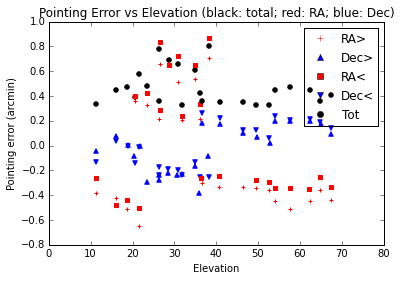

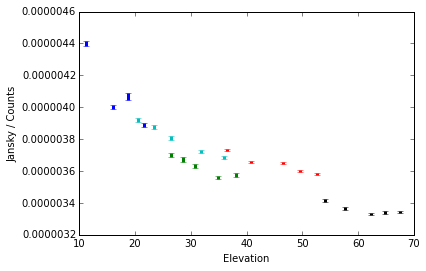

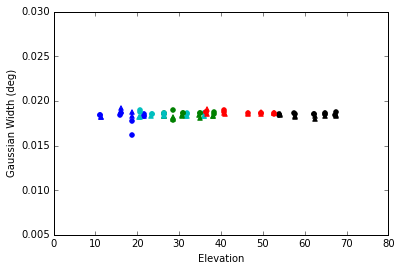

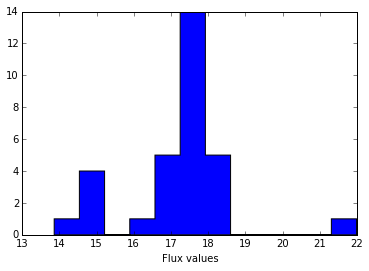

In [18]:
show_calibration(full_table_r21)

Notice that for Roach 2 data the results are largely consistent. But:

* Error bars of calibrators are lower
    
* Flux values for the source are lower

* Conversion factors for calibrators show a strong dependence on elevation and / or flux

These things are worth further investigation.

# Behavior of single calibrators

Let's see where this apparent discrepancy can come from, by plotting all curves that correspond to a given calibrator

## Total power

../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-124810-scicom-3C123/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-125057-scicom-3C147/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-125455-scicom-3C286/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-125721-scicom-3C295/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-130110-scicom-3C48/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-130416-scicom-3C123/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-130703-scicom-3C147/summary.fits is an invalid file
fit failed
../../TEST_DATASET/20150624/tp/20150624-131106-scicom-3C286/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-131333-scicom-3C295/summary.fits is an invalid file
../../TEST_DATASET/20150624/tp/20150624-131722-scicom-3C48/summary.fits

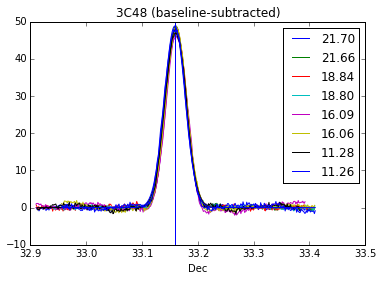

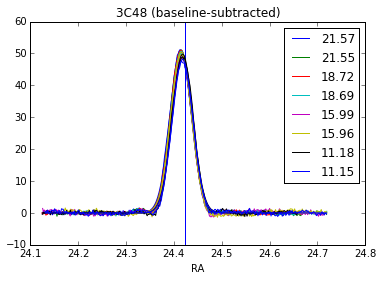

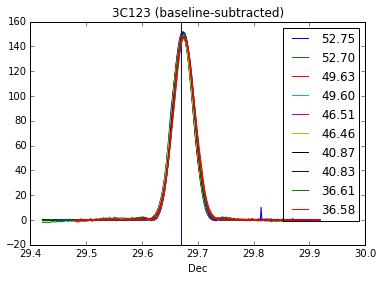

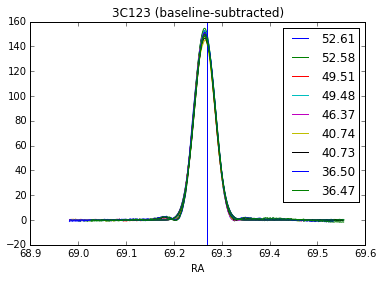

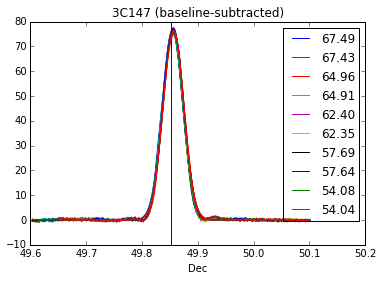

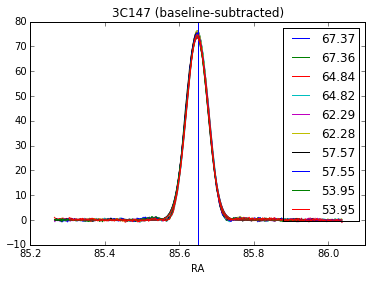

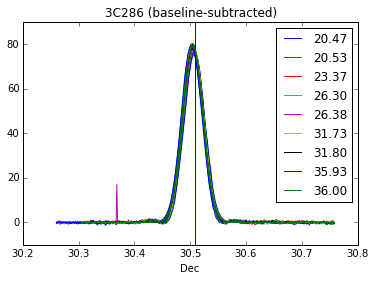

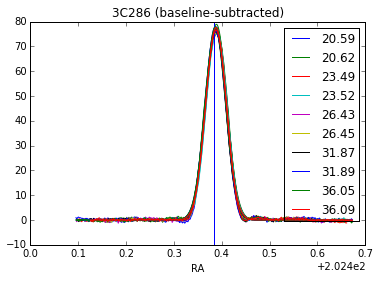

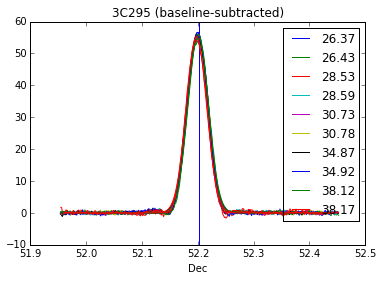

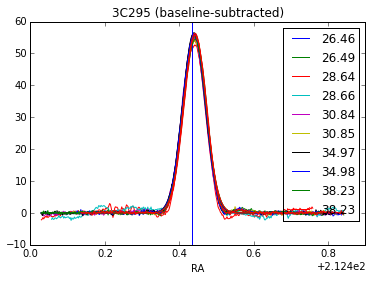

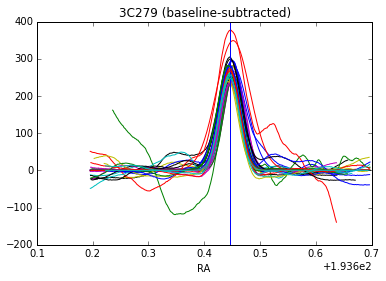

In [19]:
_ = get_full_table(config_file_tp, channel='Ch0', plotall=True, verbose=False)
plt.show()

In some scans, there is an apparent movement of the Gaussian maximum. This might be due to slight pointing errors, but there is no strong evidence (from the Pointing error vs Elevation plots abeve) that this might produce the steep dependence of calibration on elevation. But there is also a slight change of the Gaussian intensity in these curves. This might be related to elevation. Let's look at the Roach data

## Roach 2

fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed


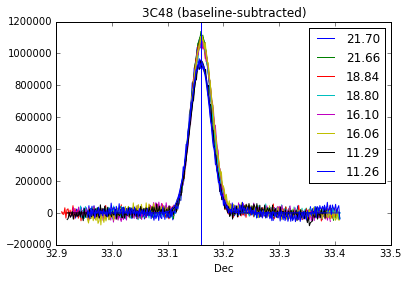

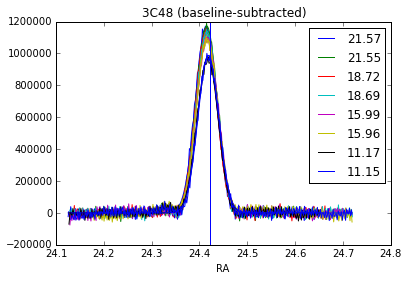

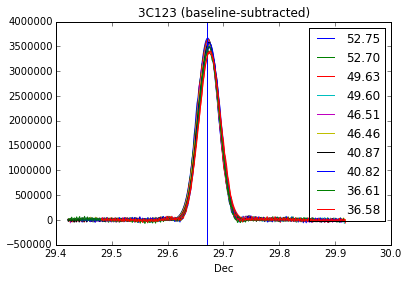

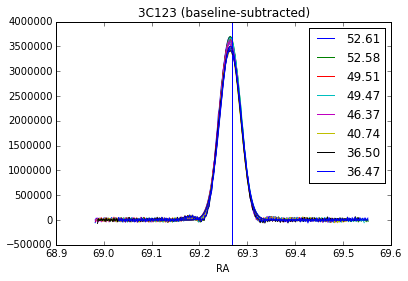

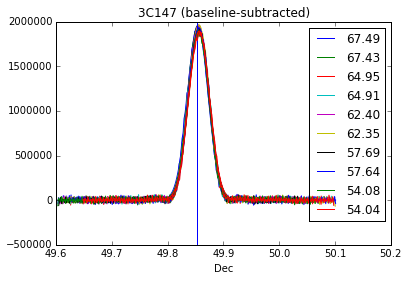

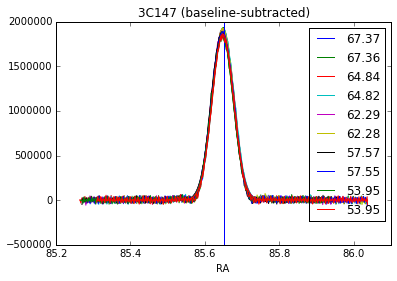

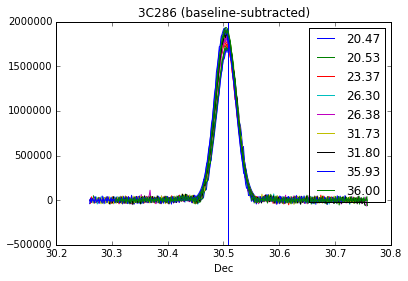

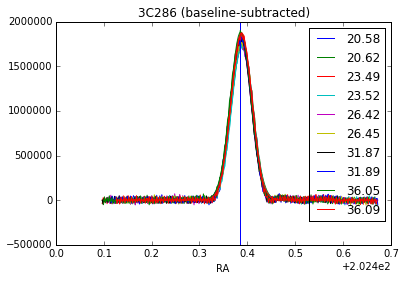

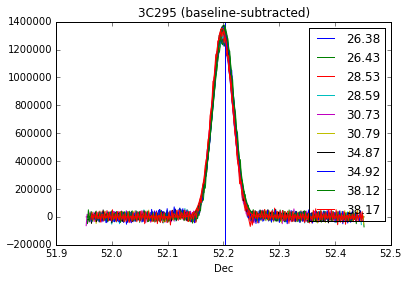

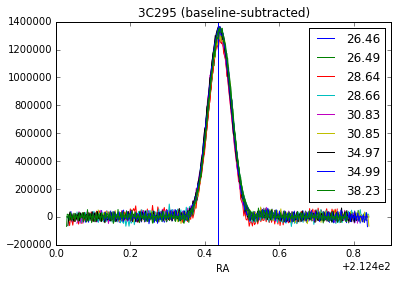

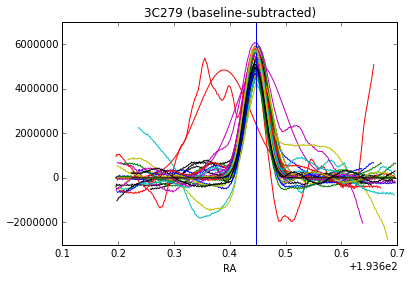

In [20]:
_ = get_full_table(config_file_r2, channel='Ch0', plotall=True, verbose=False)
plt.show()

Here, the change of the Gaussian amplitude is more extreme than in the total power curves. In some sources, like 3C48, the change of intensity is very large. Lower amplitudes at lower elevation, and this might indeed be related to a change of opacity. 

fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed
fit failed


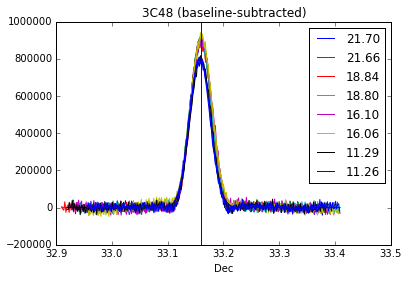

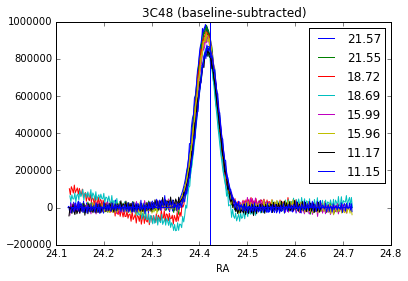

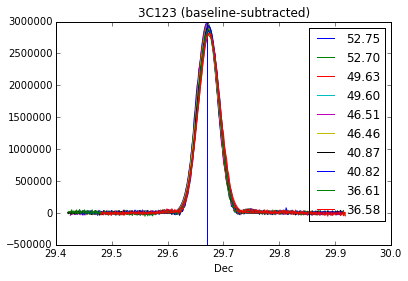

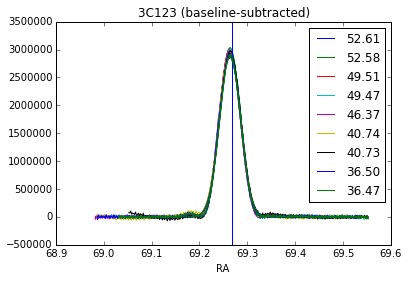

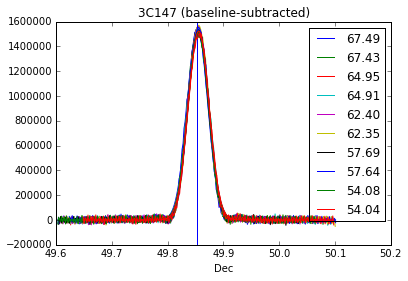

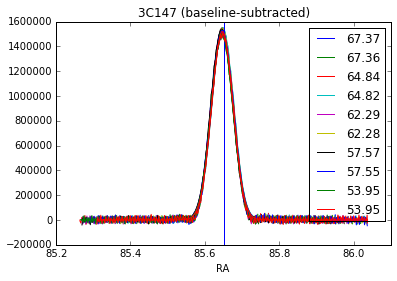

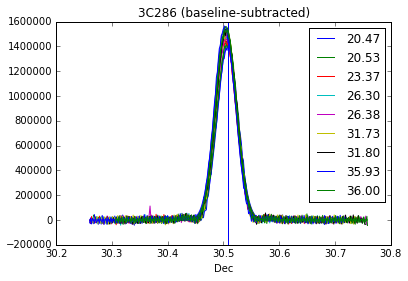

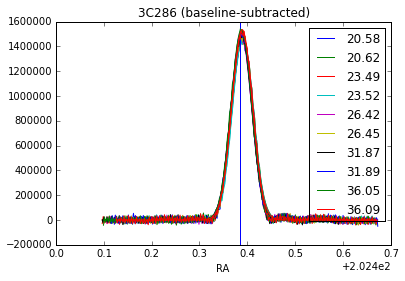

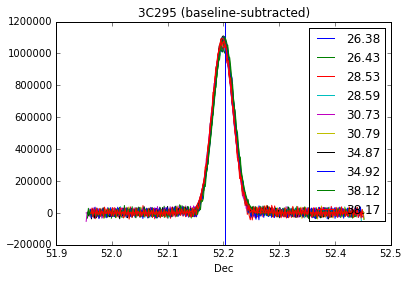

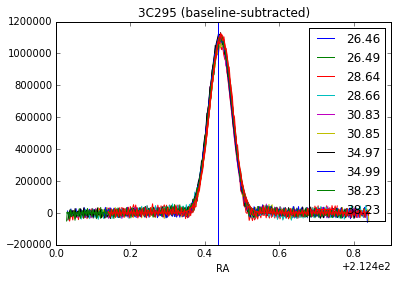

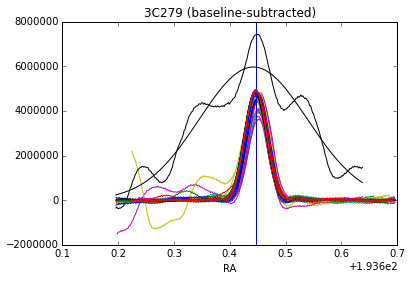

In [21]:
_ = get_full_table(config_file_r2, channel='Ch1', plotall=True, verbose=False)
plt.show()